In [170]:
using Plots
using LinearAlgebra
using DifferentialEquations
include("Solvers.jl")
include("UsefulFunctions.jl")

PointsSolutions (generic function with 1 method)

In [192]:
function CorrelationMatrix_TwoSolvers(p, Δt1, Δt2, t, x̄₀, Solver1, Solver2)
    # Assuming that Δt1 > Δt2
    tsteps1 = Integer(t/Δt1)
    tsteps2 = Integer(t/Δt2)
    correlation = zeros(tsteps1)
    if typeof(Solver1) == UnionAll && typeof(Solver2) == UnionAll
        X1 =  LorenzSolutionFixedTimeStep(p, Δt1, tsteps1, x̄₀, Solver1).u
        X2 = LorenzSolutionFixedTimeStep(p, Δt2, tsteps2, x̄₀, Solver2).u
        for i=1:tsteps1
            correlation[i] = Correlation(X1[i,1],X2[i*Integer(Δt1/Δt2),1])
        end
        
    elseif typeof(Solver1) == UnionAll && typeof(Solver2) != UnionAll
        X1 =  LorenzSolutionFixedTimeStep(p, Δt1, tsteps1, x̄₀, Solver1).u
        X2 = LorenzSolutionFixedTimeStep(p, Δt2, tsteps2, x̄₀, Solver2)
        for i=1:tsteps1
            correlation[i] = Correlation(X1[i,1],X2[:,i*Integer(Δt1/Δt2)])
        end
        
    elseif typeof(Solver1) != UnionAll && typeof(Solver2) == UnionAll
        X1 =  LorenzSolutionFixedTimeStep(p, Δt1, tsteps1, x̄₀, Solver1)
        X2 = LorenzSolutionFixedTimeStep(p, Δt2, tsteps2, x̄₀, Solver2).u
        for i=1:tsteps1
            correlation[i] = Correlation(X1[:,i],X2[i*Integer(Δt1/Δt2),1])
        end
    else
        X1 =  LorenzSolutionFixedTimeStep(p, Δt1, tsteps1, x̄₀, Solver1)
        X2 = LorenzSolutionFixedTimeStep(p, Δt2, tsteps2, x̄₀, Solver2)
        for i=1:tsteps1
            correlation[i] = Correlation(X1[:,i],X2[:,i*Integer(Δt1/Δt2)])
        end
    end
    return correlation
end

CorrelationMatrix_TwoSolvers (generic function with 2 methods)

In [180]:
function Plot_Correlation(Δt1, Δt2, time,inital_vals,p, Solver1, Solver2)
    
    plt=plot()
    for x̄₀ in eachcol(inital_vals)
        tsteps = Int(time/Δt)
        correlation = CorrelationMatrix_TwoSolvers(p, Δt1, Δt2, tsteps, x̄₀, Solver1, Solver2)
        plot!(plt,range(0,stop=time-Δt,step=Δt),correlation,label="x₀ = $x̄₀")
    end
    display(plt)

end

Plot_Correlation (generic function with 4 methods)

In [181]:
function Plot_Correlation_Histogram(Δt1, Δt2, time, inital_vals, p, Solver1, Solver2)
    # Plots a histogram of the time it takes for the correlation between Solver1 and Solver2 to reach 0.5
    
    correlations=zeros(length(inital_vals[1,:]))
    j=1
    for x̄₀ in eachcol(inital_vals)
        tsteps = Int(time/Δt1)
        correlation = CorrelationMatrix_TwoSolvers(p, Δt1, Δt2, time, x̄₀, Solver1, Solver2)
        i=1
        while correlation[i] > 0.5 && i<tsteps
            i+=1
        end
        correlations[j] = i*Δt
        j=j+1
    end
    plot(initial_vals[3,:],correlations, seriestype= :bar, ylabel= "time", xlabel= "initial z value", legend=false, dpi=300)

end

Plot_Correlation_Histogram (generic function with 4 methods)

In [185]:
function Plot_Correlation_Heatmap(Δt1, Δt2, time,x̄₀,nr_of_initial_vals,p,Solver1,Solver2)
    correlations=zeros(nr_of_initial_vals,nr_of_initial_vals)
    for m = 1:nr_of_initial_vals
        for n = 1:nr_of_initial_vals
            
            x̄ = x̄₀+[m-nr_of_initial_vals/2;n-nr_of_initial_vals/2;0]
            tsteps = Int(time/Δt1)
            correlation = CorrelationMatrix_TwoSolvers(p, Δt1, Δt2,tsteps, x̄, Solver1, Solver2)
            
            i=1
            while correlation[i] > 0.5 && i<tsteps
                i+=1
            end
            correlations[m,n] = i*Δt
            
        end
    end

    heatmap((x̄₀[1]-nr_of_initial_vals/2):(x̄₀[1]+nr_of_initial_vals/2)-1,(x̄₀[2]-nr_of_initial_vals/2):(x̄₀[2]+nr_of_initial_vals/2)-1,correlations,xlabel="x",ylabel="y",zlabel="correlation time",dpi=300)
end

Plot_Correlation_Heatmap (generic function with 3 methods)

In [154]:
## parameter values
θ = 10.0; β = 8/3; μ = 28
p=[θ,μ,β]
t = 100
Δt = 0.01
# initial values
x̄₀ = [sqrt(8*22.5/3);
      sqrt(8*22.5/3);
      22.5]

nr=15
initial_vals = zeros(3,nr)
for i=1:nr
    initial_vals[:,i] = x̄₀ + [0; 0;-100+i]
end

In [191]:
Δt1 = Δt
Δt2 = Δt/2
tsteps = Int(t/Δt1)
X1 =  LorenzSolutionFixedTimeStep(p, Δt1, Int(t/Δt1), x̄₀, RadauIIA5).u
X2 = LorenzSolutionFixedTimeStep(p, Δt2, Int(t/Δt2), x̄₀, RadauIIA5).u
correlation = zeros(tsteps)

for i=1:tsteps
    correlation[i] = Correlation(X1[i,1],X2[i*Integer(Δt1/Δt2),1])
end


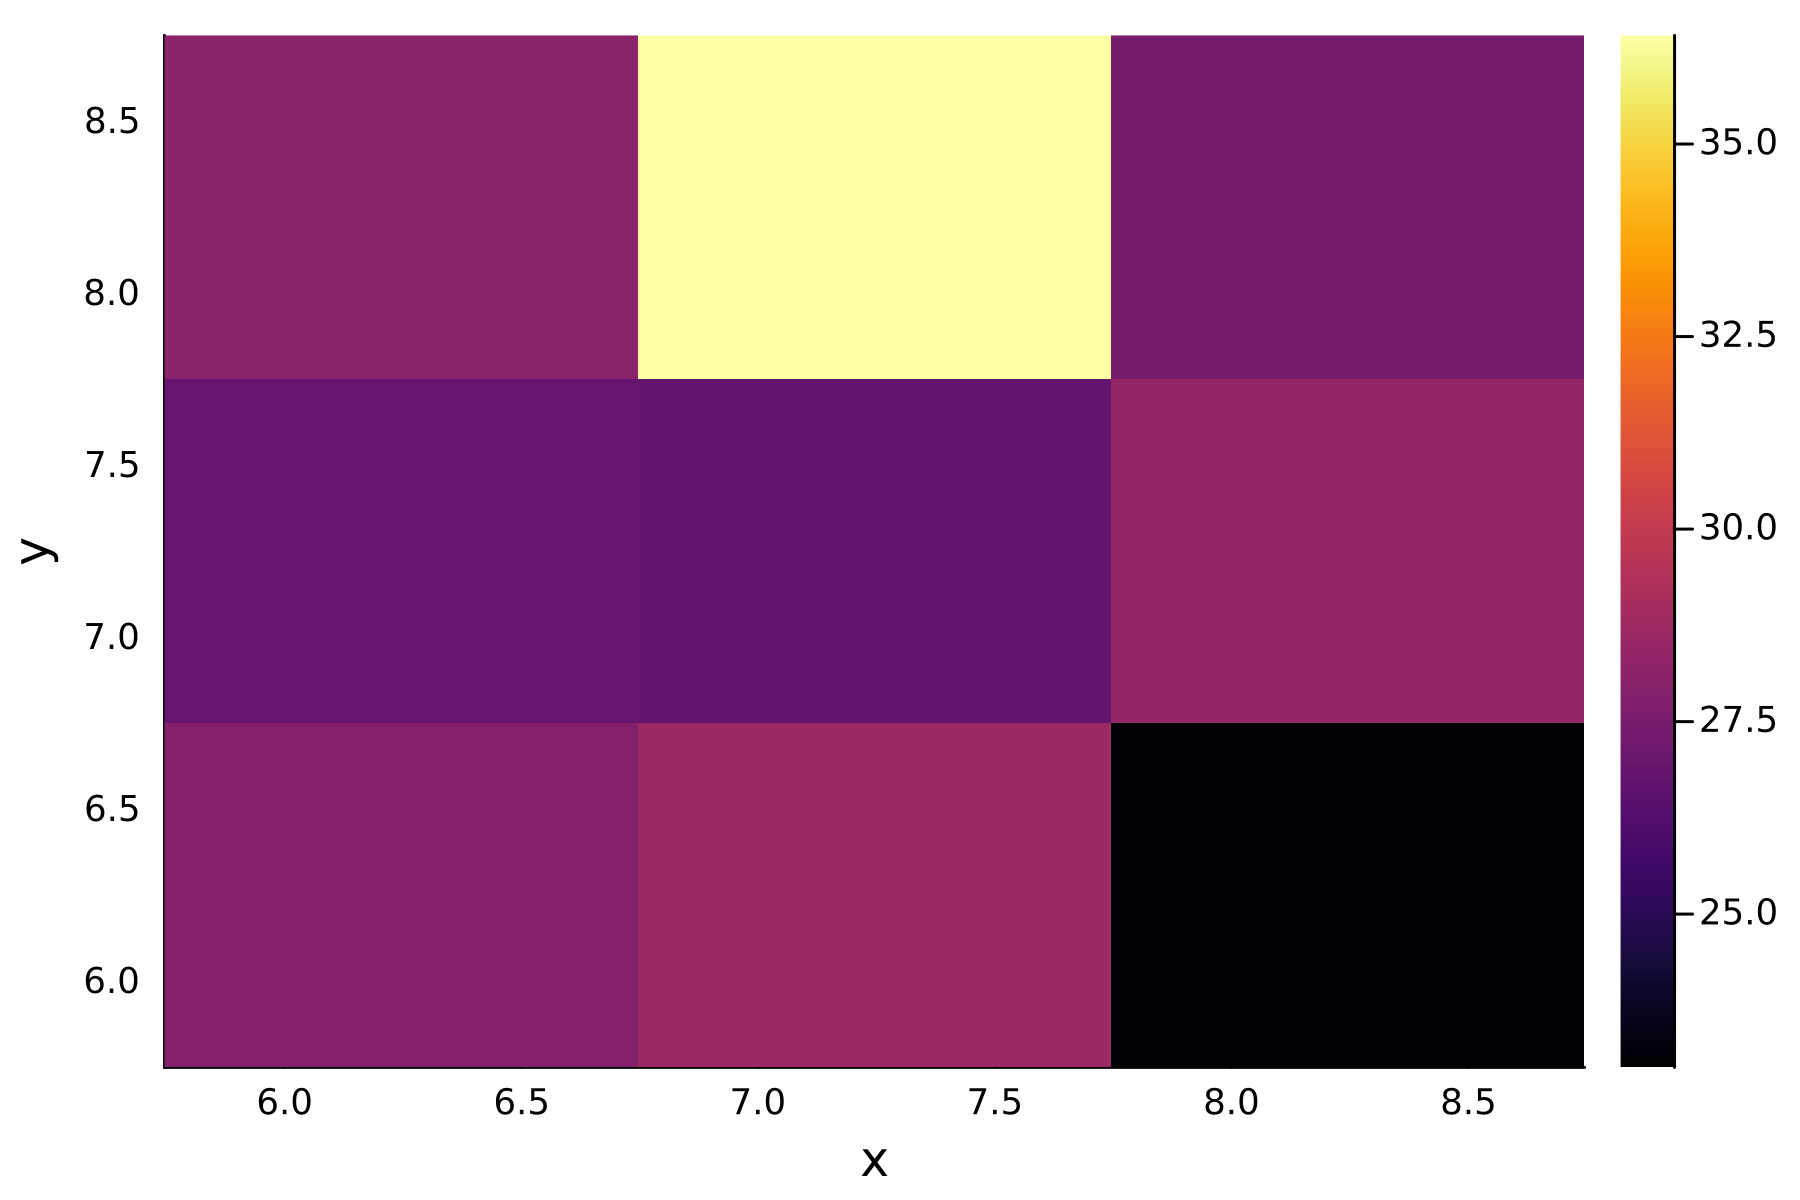

In [196]:
Plot_Correlation_Heatmap(Δt,Δt/2,40,x̄₀,3,p, Rodas5, Rodas5)